# Pearson Correlation

The Pearson correlation, also known as Pearson's correlation coefficient, is a measure of the linear relationship between two variables. It is named after Karl Pearson, who developed the concept. The Pearson correlation coefficient is denoted by the symbol "r" and ranges between -1 and 1.

The formula for calculating the Pearson correlation coefficient between two variables, X and Y, is as follows:

- r = (Σ((Xi - X̄)(Yi - Ȳ))) / sqrt(Σ((Xi - X̄)^2) * Σ((Yi - Ȳ)^2))

In this formula:

- Xi and Yi represent the individual values of X and Y, respectively.
- X̄ and Ȳ represent the mean values of X and Y, respectively.
- Σ denotes the sum of the values over the entire data set.

It's important to note that the Pearson correlation coefficient only measures the strength and direction of a linear relationship between variables. It does not capture non-linear relationships or other types of associations between variables.

In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [6]:
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df["MEDV"] = housing.target

In [7]:
housing.feature_names 

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [8]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
x = df.drop('MEDV', axis=1)
y = df[['MEDV']]

In [10]:
x.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24


In [11]:
y.head(2)

,MEDV
0,4.526
1,3.585


In [13]:
from sklearn.model_selection import train_test_split as tts
#Spliting the dataset in test and train portions

X_train, X_test, y_train, y_test = tts (x, y, test_size = 0.3, random_state=0)
X_train.shape, X_test.shape

((14448, 8), (6192, 8))

In [14]:
X_train.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.120396,0.358747,-0.059383,0.006284,0.002043,-0.085176,-0.010093
HouseAge,-0.120396,1.000000,-0.162349,-0.077218,-0.299736,0.013631,0.020830,-0.117501
AveRooms,0.358747,-0.162349,1.000000,0.825325,-0.068784,0.005120,0.105380,-0.025010
AveBedrms,-0.059383,-0.077218,0.825325,1.000000,-0.060845,-0.002736,0.068443,0.013283
Population,0.006284,-0.299736,-0.068784,-0.060845,1.000000,0.074734,-0.117704,0.108161
AveOccup,0.002043,0.013631,0.005120,-0.002736,0.074734,1.000000,-0.003676,0.012906
Latitude,-0.085176,0.020830,0.105380,0.068443,-0.117704,-0.003676,1.000000,-0.925158
Longitude,-0.010093,-0.117501,-0.025010,0.013283,0.108161,0.012906,-0.925158,1.000000


<Axes: >

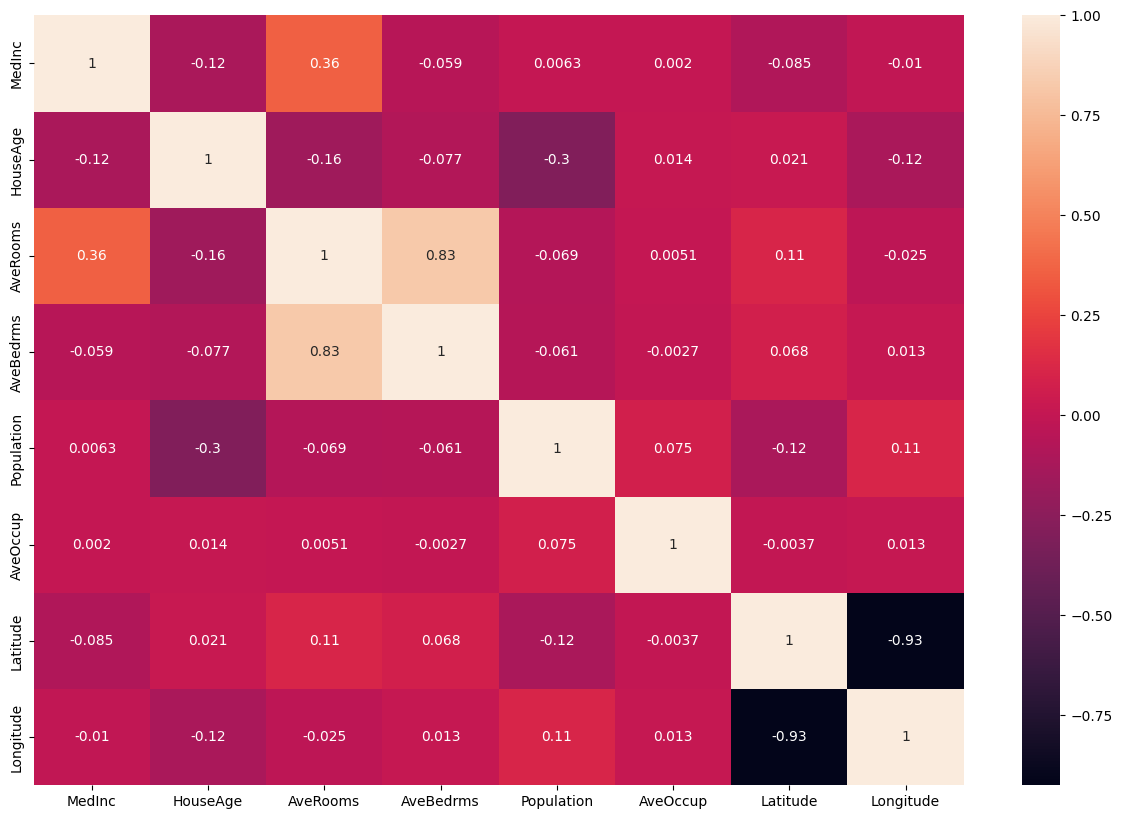

In [22]:
import seaborn as sns
#Appying Pearson Correlation
plt.figure(figsize = (15,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True)

In [23]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [26]:
corr_features = correlation(X_train, 0.5)
len(set(corr_features))

1

In [27]:
corr_features

{'AveBedrms'}

In [28]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude
14740,4.1518,22.0,5.663073,1551.0,4.180593,32.58,-117.05
10101,5.7796,32.0,6.107226,1296.0,3.020979,33.92,-117.97
20566,4.3487,29.0,5.930712,1554.0,2.910112,38.65,-121.84
2670,2.4511,37.0,4.992958,390.0,2.746479,33.20,-115.60
15709,5.0049,25.0,4.319261,649.0,1.712401,37.79,-122.43
...,...,...,...,...,...,...,...
19681,3.0962,36.0,4.746421,1168.0,2.388548,39.15,-121.62
12156,4.1386,2.0,8.821216,2826.0,3.368296,33.66,-117.17
10211,7.8750,30.0,7.550926,523.0,2.421296,33.89,-117.91
2445,2.0658,34.0,5.938144,363.0,3.742268,36.56,-119.64


## Try with Big Dataset

In [29]:
df1 = pd.read_csv('E:\Feature Selection\Datasets\santander.csv',nrows=10000)
df1.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [31]:
df1.shape

(10000, 371)

In [32]:
XX = df1.drop(labels=['TARGET'], axis=1)
yy = df1['TARGET']

XX_train, XX_test, Yy_train, yY_test = tts(XX, yy,test_size=0.3, random_state=0)
XX_train.shape, XX_test.shape

((7000, 370), (3000, 370))

In [33]:
cor_mat = XX_train.corr()

<Axes: >

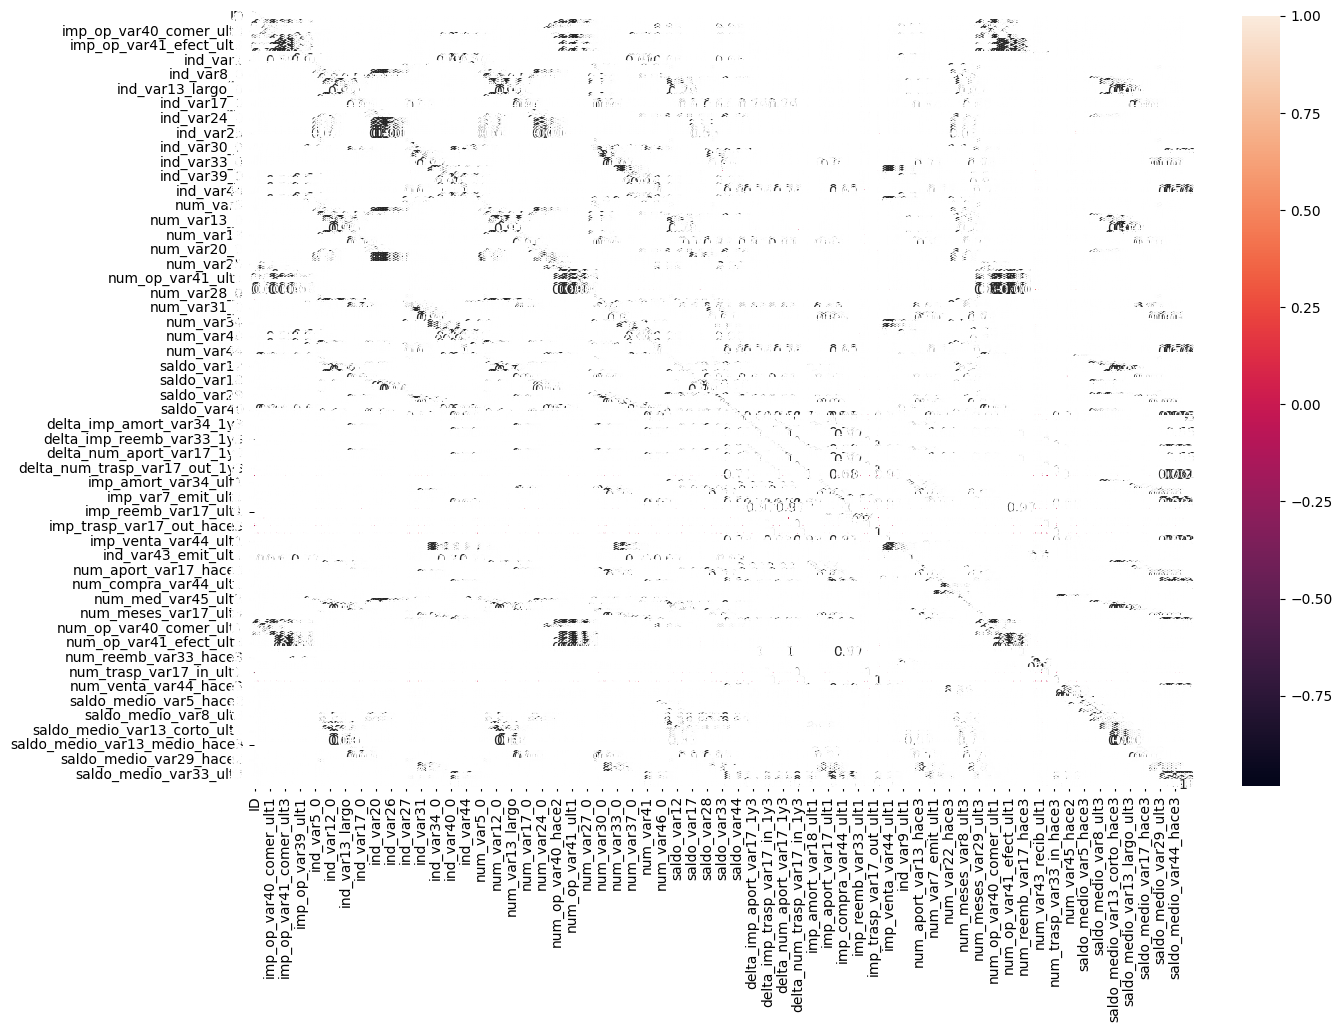

In [35]:
plt.figure(figsize = (15,10))
sns.heatmap(cor_mat, annot=True)

#it is not clear as there are more than 350 features

In [36]:
corr_features1 = correlation(XX_train, 0.9)
len(set(corr_features1))

155

In [37]:
corr_features1

{'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_venta_var44_1y3',
 'imp_aport_var17_ult1',
 'imp_aport_var33_hace3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_reemb_var13_ult1',
 'imp_trasp_var17_in_ult1',
 'imp_trasp_var33_in_ult1',
 'imp_venta_var44_ult1',
 'ind_var10cte_ult1',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_largo',
 'ind_var20',
 'ind_var24',
 'ind_var25',
 'ind_var25_0',
 'ind_var26',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var29',
 'ind_var29_0',
 'ind_var31',
 'ind_var32',
 'ind_var32_0',
 'ind_var37',
 'ind_var37_0',
 'ind_var39',
 'ind_var40',
 'ind_var40_0',
 'ind_var41_0',
 'ind_var44',
 'ind_var6',
 'ind_var8',
 'ind_var9_cte_ult1',
 'ind_var9_ult1',
 'num_aport_var13_ult1',
 'num_aport_var17

In [40]:
XX_train.drop(corr_features1, axis=1, inplace = True)
XX_test.drop(corr_features1, axis=1, inplace = True)

In [41]:
XX_train.shape, XX_test.shape

((7000, 215), (3000, 215))